# Clustering Countries for Strategic Aid Allocation

#### Problem statement:

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

### Data description

- Country: Name of the country
- Child_mort: Death of children under 5 years of age per 1000 live births
- Exports: Exports of goods and services per capita. Given as %age of the GDP per capita
- Health: Total health spending per capita. Given as %age of GDP per capita
- Imports: Imports of goods and services per capita. Given as %age of the GDP per capita
- Income: Net income per person
- Inflation: The measurement of the annual growth rate of the Total GDP
- Life_expec: The average number of years a new born child would live if the current mortality patterns are to rem...
- Total_fer: The number of children that would be born to each woman if the current age-fertility rates remain th...
- Gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.


## EDA and Hypothesis testing

Building upon the initial Tableau visualizations, let's delve deeper into the data using Exploratory Data Analysis (EDA) and hypothesis testing techniques. This will provide insights beyond basic trends and help us understand the factors influencing which countries require the most aid.

#### Suggestions for EDA

##### Data Cleaning and Outlier Handling:
- Missing Value Analysis: Identify missing values across all features. For numerical data like Income or Exports, consider imputation using techniques like mean/median filling or k-Nearest Neighbors (kNN). For textual data in project descriptions, explore text augmentation techniques to generate similar content and fill in missing information.
- Outlier Detection: Analyze features like Child_mortality, Income, and Gdpp (GDP per capita) for potential outliers. Utilize techniques like Interquartile Range (IQR) to identify data points that fall outside the range of 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3). Apply winsorization to cap outliers to the nearest non-outlier values instead of outright removal, preserving valuable data points.


##### Univariate Analysis:
- Focus on Distributions: Go beyond basic histograms for Child_mortality, Income, and Life_expec. Explore box plots to identify potential skewness or outliers. Consider kernel density estimation (KDE) plots to visualize the underlying distribution of continuous variables.
- Categorical Variables: Analyze the distribution of categorical variables like Country using bar charts or pie charts. Identify the most and least represented countries to understand the geographical scope of the data.


##### Bivariate Analysis:
- Correlations: Calculate the correlation matrix to assess linear relationships between all numerical features. Look for strong positive or negative correlations that might indicate dependencies between factors like Health spending and Life_expec.
- Explore scatter plots to visualize these relationships and identify potential outliers that might skew the correlation coefficient.

#### Suggestions for Hypothesis Testing

##### Health Spending and Life Expectancy:
- Hypothesis: Increased health spending (% of GDP) leads to higher life expectancy (Life_expec).
- Test: Conduct a t-test to compare the mean life expectancy of countries with high health spending versus those with low spending. This will provide statistical evidence for the association between these factors.

##### Fertility and Development:
- Hypothesis: Countries with higher Total_fertility rates have lower Income per person. (Correlation analysis and t-test)


##### Income and Child Mortality:
- Hypothesis: Higher income levels are associated with lower child mortality rates.
- Test: Perform a correlation analysis (Pearson or Spearman) to determine the strength and direction of the relationship between income and child mortality rates. Additionally, conduct a t-test to compare the mean child mortality rates between countries with high income and low income.


##### Inflation and Economic Stability:
- Hypothesis: Higher inflation rates are associated with lower GDP per capita, indicating economic instability.
- Test: Perform a correlation analysis to examine the relationship between inflation and GDP per capita. Additionally, conduct a t-test to compare the mean GDP per capita between countries with high inflation and low inflation.

## ML Modeling

Building on the insights from EDA and hypothesis testing, we can leverage unsupervised learning techniques to categorize countries based on their socio-economic and health factors. This will help HELP International strategically allocate their $10 million aid to the countries in the direst need.


#### Data Preprocessing:

- Missing Value Imputation: Handle missing values in any column using techniques like mean/median imputation for numerical features and removal for outliers if missingness is low.
- Normalization: Standardize or normalize numerical features (e.g., Income, Exports) to ensure all features contribute equally to the clustering process.
- Encoding Categorical Variables: If any categorical variables exist (e.g., Region), encode them using one-hot encoding for compatibility with clustering algorithms.
- Feature Engineering: Create new features that might capture aspects of development:
  - Indicators: Create binary features based on thresholds (e.g., "High_Child_Mortality" if Child_mortality rate exceeds a certain value).
  - Ratios: Calculate ratios between features (e.g., Exports/Imports) to indicate economic dependence.

##### Model Selection:

Here, we'll focus on unsupervised learning algorithms for clustering countries based on their development needs:

- K-Means Clustering: A popular choice for grouping data points into a predefined number of clusters (k). This is effective when the number of clusters is known or can be estimated beforehand.
- Hierarchical Clustering: This method creates a hierarchy of clusters, allowing you to explore different levels of granularity and identify natural groupings in the data. It's helpful when the optimal number of clusters is unknown.
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise): This algorithm can identify clusters of arbitrary shapes and handle outliers effectively, which might be relevant for countries with unique development challenges.

##### Model Training and Evaluation:

- Choosing the Right Number of Clusters (k): For K-Means, techniques like the Elbow Method or Silhouette Analysis can help determine the optimal number of clusters (k) that best captures the data's inherent groupings.
- Evaluation Metrics: Since we lack labeled data (developed vs. developing countries) for supervised learning, specific unsupervised evaluation metrics come into play:
- Silhouette Coefficient: Measures the average silhouette score for all data points, considering how well each point is assigned to its cluster compared to neighboring clusters. Higher scores indicate better clustering.
Visualization: Visualize the clusters using techniques like scatter plots with dimensionality reduction (e.g., PCA) to understand the separation and distribution of countries within each cluster.

## Importing libraries and Dataset:

In [244]:
import numpy as np
import pandas as pd

# To Visualisation our data
import matplotlib.pyplot as plt
import seaborn as sns

# To transform our data
from scipy import stats
from scipy.stats.mstats import winsorize

# To Scale our data
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import silhouette_score

# To perform Dimension Reduction
from sklearn.decomposition import PCA

# To perform KMeans clustering
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# To display data dictionary whole
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 1000)

# Ignore warnings
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Country-data.csv')

In [247]:
# Setting the country column as a Index
df.set_index('country',inplace=True)

In [248]:
# Checking the top 5 rows of the dataframe
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [249]:
# Checking the bottom 5 rows of the dataframe
df.tail()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [250]:
# Checking the shape of the dataframe
df.shape

(167, 9)

In [251]:
# Checking the datatyoes of the dataframe columns
df.dtypes

,0
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


In [252]:
# listing the columns of the dataframe
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

The dataset includes **9 features with information on 167 countries**.

Features are as follows:
* child_mort: death of children under 5 years of age per 1,000 live births
* exports: exports of goods and services per capita. Given as % of the GDP per capita.
* health: total health-related spending per capita. Given as % of GDP per capita.
* imports: imports of goods and services per capita. Given as % of the GDP per capita.
* income: net income per person.
* Inflation: rate of increase in prices and fall in the purchasing value of money.
* life_expec: the average number of years a new born child would live if the current mortality patterns are to remain the same.
* total_fer: the number of children that would be born to each woman if the current age-fertility rates remain the same.
* gdpp: the GDP per capita in USD (GDP divided by the total population).

In [253]:
# Statical summary of the dataframe
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


After checking general dataset stats, we can confirm the dataset contain valid data:
+ Average life expectancy: 70.5 years
+ Average child mortality rate (per 1,000 live births): 38.3
+ Average fertility rate: 2.9
* Median fertility rate: 2.4
* Average Income: 17,145 USD
+ Average GDP per capita: 12,964 USD

###  Data Cleaning <a name=cleaning></a>

In [254]:
# Check if there is any duplicated records
df.duplicated().any()

False

In [255]:
# Checking Missing Value
def missingValue(df):
    # Identifying Missing data.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total Records = ", df.shape[0])

    md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return md
print("Total Columns = ", df.shape[1])
missingValue(df)

Total Columns =  9
Total Records =  167


,Total Missing,In Percent
child_mort,0,0.0
exports,0,0.0
health,0,0.0
imports,0,0.0
income,0,0.0
inflation,0,0.0
life_expec,0,0.0
total_fer,0,0.0
gdpp,0,0.0


In [256]:
def plot_numerical_features_boxplots(data, columns_list, rows, cols, title):
    fig, axs = plt.subplots(rows, cols, figsize=(15, 8), sharey=True)
    fig.suptitle(title, fontsize=12, y=1)
    axs = axs.flatten()
    outliers_df = pd.DataFrame(columns=['Column', 'Outlier_index', 'Outlier_values'])
    for i, col in enumerate(columns_list):
        sns.boxplot(x=data[col],  ax=axs[i], palette='Accent')
        axs[i].set_title(f'{col} (skewness: {data[col].skew().round(2)})', fontsize=10)
        #----------------------------
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))
        outliers_index = data[outliers].index.tolist()
        outliers_values = data[col][outliers].tolist()
        outliers_df = outliers_df._append({'Column': col, 'Outlier_index': outliers_index, 'Outlier_values': outliers_values}, ignore_index=True)
        axs[i].plot([], [], 'ro', alpha=0.5, label=f'Outliers: {outliers.sum()}')
        axs[i].plot([], [], 'ro', alpha=0.5, label=f'% Outliers: {round(outliers.sum()/data[col].count()*100,2)}')
        axs[i].legend(loc='upper right', fontsize=9)
    plt.tight_layout()
    return outliers_df

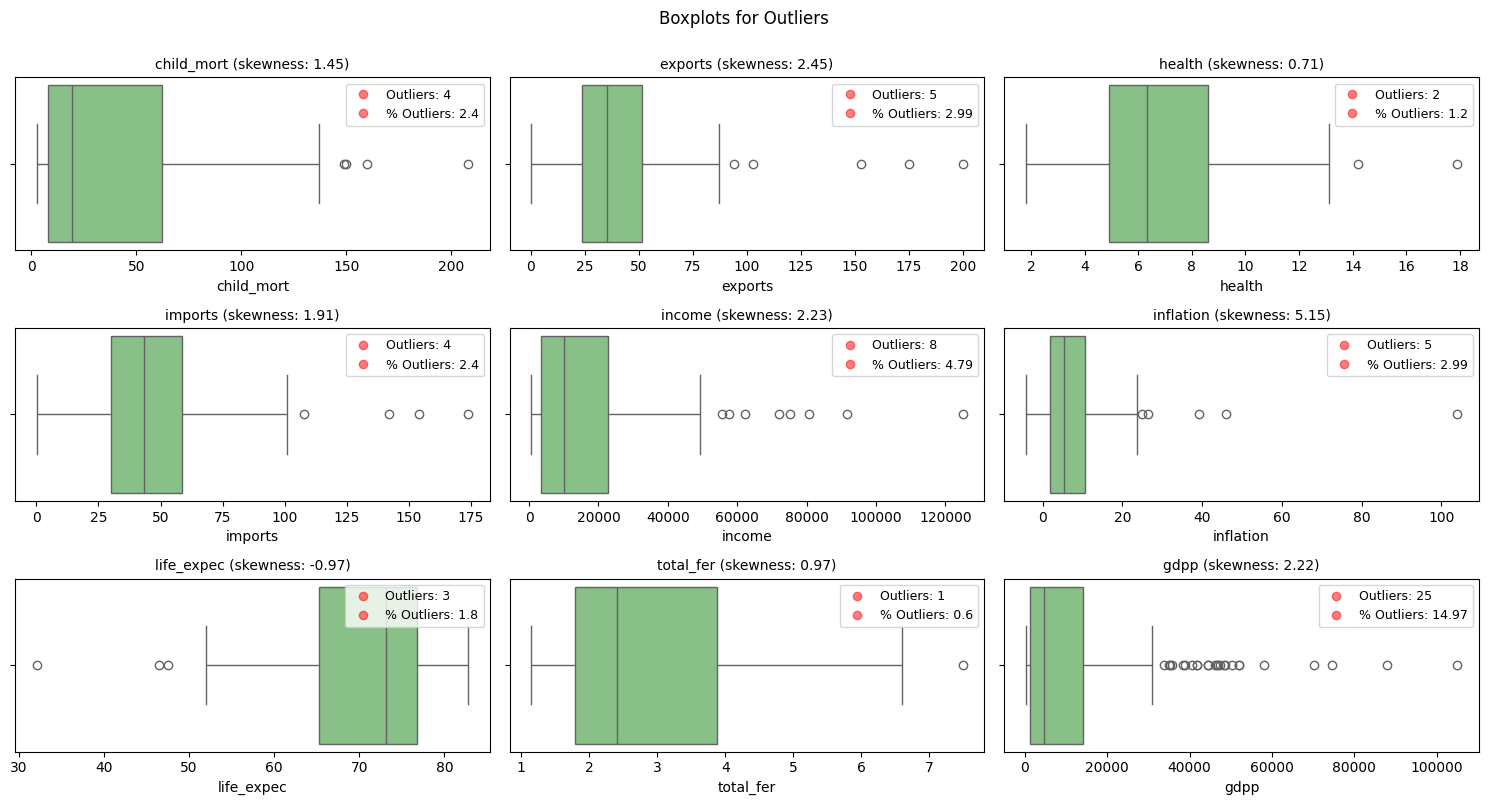

In [257]:
outliers_df = plot_numerical_features_boxplots(data=df, columns_list=df.columns, rows=3, cols=3, title='Boxplots for Outliers')

In [258]:
for index, row in outliers_df.iterrows():
    print(row['Column'])
    for Outlier_index, Outlier_values in zip(row['Outlier_index'], row['Outlier_values']):
        print(f"{Outlier_index:<30} {Outlier_values:.1f}")
    print(f"No of Outlier " + row['Column'] + f" is : {len(row['Outlier_index'])}")
    print()  # Add a blank line for better readability

child_mort
Central African Republic       149.0
Chad                           150.0
Haiti                          208.0
Sierra Leone                   160.0
No of Outlier child_mort is : 4

exports
Ireland                        103.0
Luxembourg                     175.0
Malta                          153.0
Seychelles                     93.8
Singapore                      200.0
No of Outlier exports is : 5

health
Micronesia, Fed. Sts.          14.2
United States                  17.9
No of Outlier health is : 2

imports
Luxembourg                     142.0
Malta                          154.0
Seychelles                     108.0
Singapore                      174.0
No of Outlier imports is : 4

income
Brunei                         80600.0
Kuwait                         75200.0
Luxembourg                     91700.0
Norway                         62300.0
Qatar                          125000.0
Singapore                      72100.0
Switzerland                    55500.0
United Arab

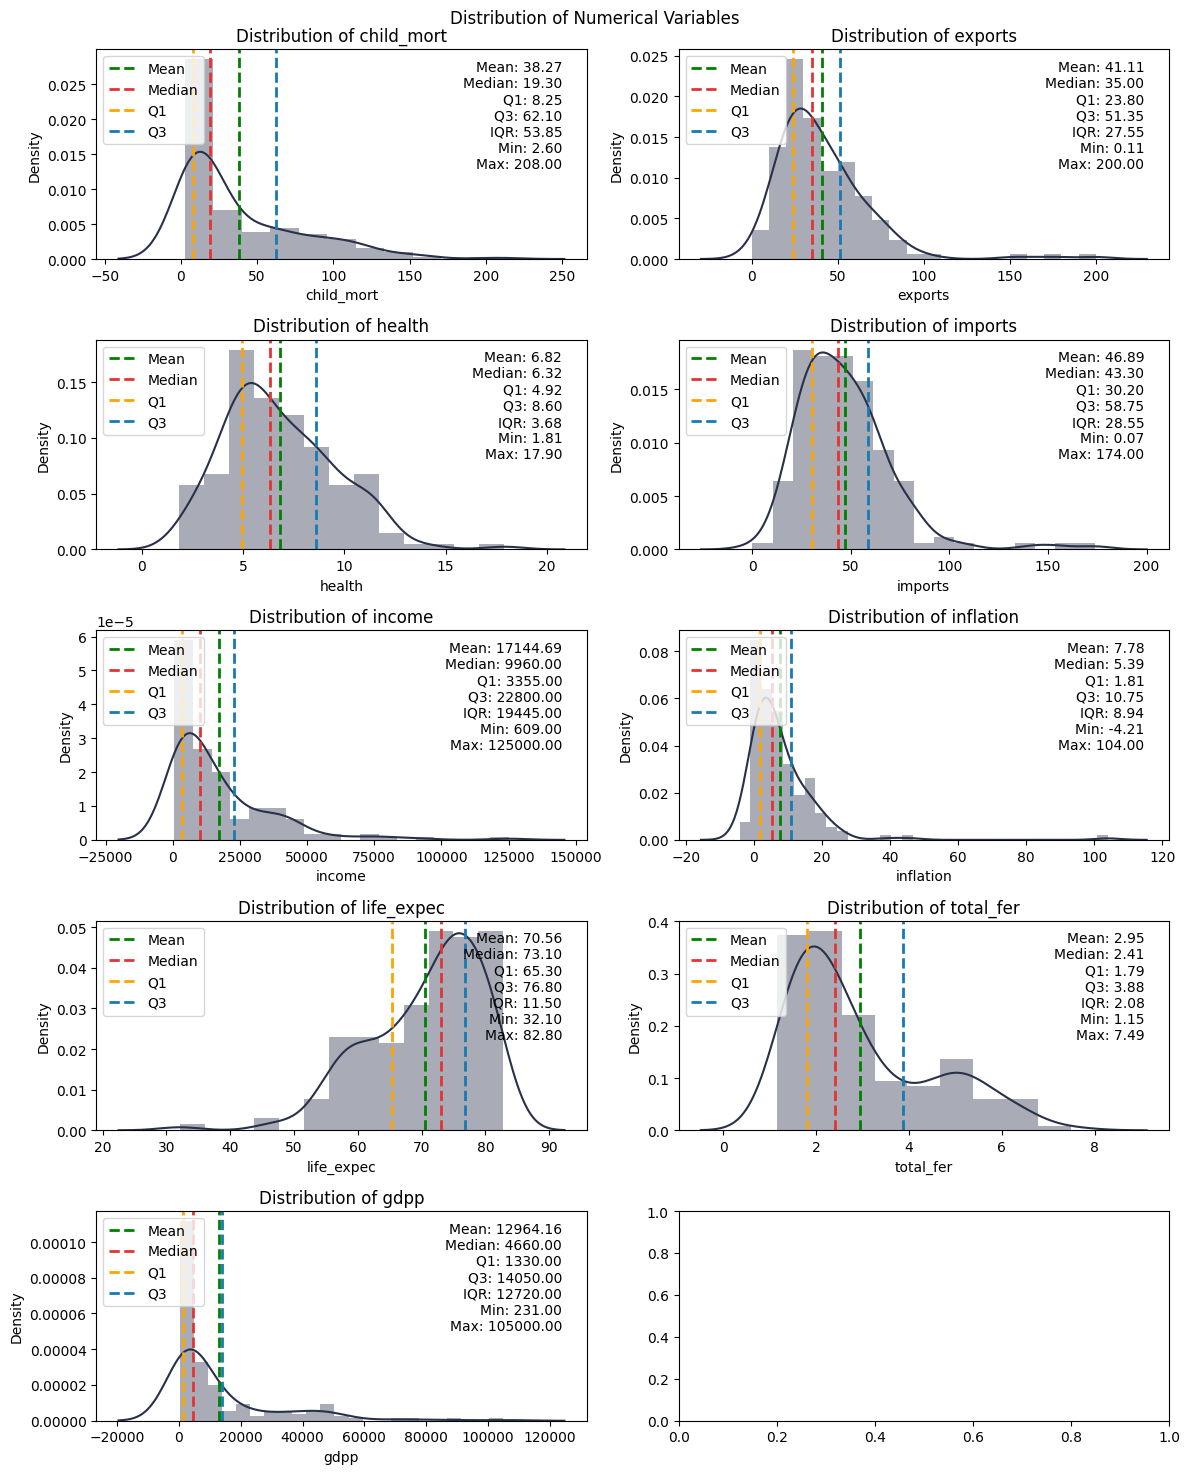

In [259]:
# Check variables distribution
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 15))

# Define colors to use for each feature
colors = ["#283149"]

# Loop through each column and plot distribution
for i, column in enumerate(df.columns):
    # Plot histogram with density curve
    sns.distplot(df[column], color=colors[i%1], ax=axes[i//2, i%2])

    # Add vertical lines for mean, median, Q1 and Q3
    axes[i//2, i%2].axvline(x=df[column].mean(), color='green', linestyle='--', linewidth=2, label='Mean')
    axes[i//2, i%2].axvline(x=df[column].median(), color='#e33434', linestyle='--', linewidth=2, label='Median')
    axes[i//2, i%2].axvline(x=df[column].quantile(0.25), color='orange', linestyle='--', linewidth=2, label='Q1')
    axes[i//2, i%2].axvline(x=df[column].quantile(0.75), color='#177ab0', linestyle='--', linewidth=2, label='Q3')

    # Add text box with important statistics
    median = df[column].median()
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    axes[i//2, i%2].text(0.95, 0.95,
                          'Mean: {:.2f}\nMedian: {:.2f}\nQ1: {:.2f}\nQ3: {:.2f}\nIQR: {:.2f}\nMin: {:.2f}\nMax: {:.2f}'.format(
                              df[column].mean(), median, q1, q3, iqr, df[column].min(), df[column].max()),
                          transform=axes[i//2, i%2].transAxes,
                          fontsize=10, va='top', ha='right')

    # Add legend
    axes[i//2, i%2].legend(loc = "upper left")

    # Set title of subplot
    axes[i//2, i%2].set_title('Distribution of '+ column)

# Add overall title and adjust spacing
fig.suptitle('Distribution of Numerical Variables', fontsize=12)
fig.tight_layout()

### Outlier Analysis:

Lets not remove the outliers as it explains the country needs and also deleting outliers will delete lot of countries. Hence, lets find the outliers in the dataset, and then use the following strategies whether to keep those as such or to cap those to the corresponding higher or lower quartile values.


- `child_mort` has only higher outliers and since we need to identify the countries where `child_mort` is high and no of outliers is 4, lets **winsorize** these outliers.

- `exports` have only higher outliers and this means the country exports are high and the country is doing fine and no of outliers is 5 and hence we can **winsorize** these outliers.

- `health` has huge amount of higher outliers and this mean that these countries spend relatively lot of money on the health and hence we can **winsorize** these outliers.

- `Import` have only higher outliers and all the country is higher export than import and doing fine and no of outliers is 4 and hence we can **winsorize** these outliers.

- `income` has some amount of higher outliers and this mean that people in these countries income are very higher than the other countries and no of outliers is 8, hence we can **wisorize** these outliers.

- `inflation` has some higher outliers and no of outliers is 5 and these countries might be in need of aid and hence lets **wisorize** these outliers.

- `life_expec` has some lower outliers and no of outliers is 3 and these are the countries which need our attention and hence lets **not winsorize** these outliers.

- `total_fer` has some higher outliers and lets **winsorize** these outliers.

- `gdpp` has huge amount of higher outliers and no of outliers is 25 and this indicate that these countries are doing well by themselves and hence we can **winsorize** theae outliers.

#### Handling Outliers with Winsorization

In [260]:
df.describe(percentiles=[0.01,0.02,0.025,0.05,0.1,0.15,0.2,0.25,0.3,0.5,0.75,0.80,0.85,0.90,0.95,0.975,0.98,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,3.909400,2.121800,12.988000,742.240000,-2.348800,47.160000,1.243200,331.620000
2%,3.000000,9.131200,2.472800,15.864000,837.680000,-1.288240,52.352000,1.282800,364.320000
2.5%,3.030000,9.643000,2.516500,16.180000,892.500000,-0.960750,53.280000,1.317500,401.100000
5%,3.460000,12.120000,2.791000,18.130000,1213.000000,0.183400,55.780000,1.390000,465.900000
10%,4.200000,15.660000,3.726000,22.520000,1524.000000,0.587800,57.820000,1.452000,593.800000
15%,4.780000,19.190000,4.163000,26.780000,1924.000000,0.989500,60.370000,1.550000,767.900000


In [261]:
df['child_mort']=winsorize(df['child_mort'], limits=(0,.025))

In [262]:
df['exports']=winsorize(df['exports'], limits=(0,.03))

In [263]:
df['health']=winsorize(df['health'], limits=(0,.015))

In [264]:
df['imports']=winsorize(df['imports'], limits=(0,.025))

In [265]:
df['income']=winsorize(df['income'], limits=(0,.055))

In [266]:
df['inflation']=winsorize(df['inflation'], limits=(0,.03))

In [267]:
df['total_fer']=winsorize(df['total_fer'], limits=(0,.015))

In [268]:
df['gdpp']=winsorize(df['gdpp'], limits=(0,.15))

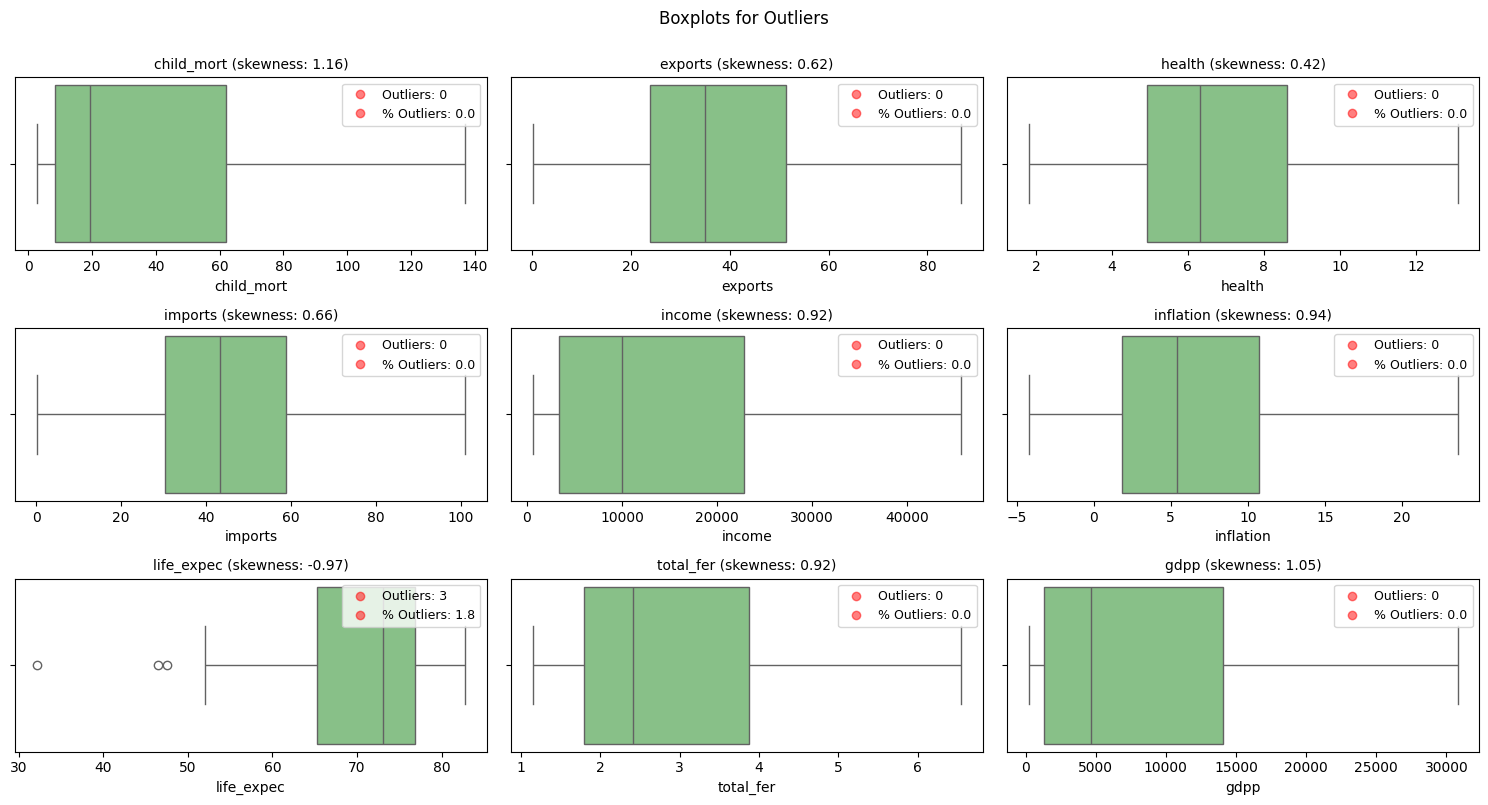

In [269]:
outliers_df = plot_numerical_features_boxplots(data=df, columns_list=df.columns, rows=3, cols=3, title='Boxplots for Outliers')

### Exploratory Data Analysis <a name=eda></a>

In [270]:
df.describe(include='all')

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.557485,39.370653,6.780359,45.848299,15599.179641,7.048299,70.555689,2.942096,10002.479042
std,38.064676,20.886279,2.636486,20.301018,14486.622169,6.662512,8.893172,1.497944,10933.824288
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,137.000000,86.900000,13.100000,101.000000,45700.000000,23.600000,82.800000,6.550000,30800.000000


Some variables are on a very different scale; before modelling, I'll normalize the data to bring all variables on the same scale to avoid the features with the highest scale to dominate the clustering algorithms.

Let's look into the distribution and feature correlation of our data.

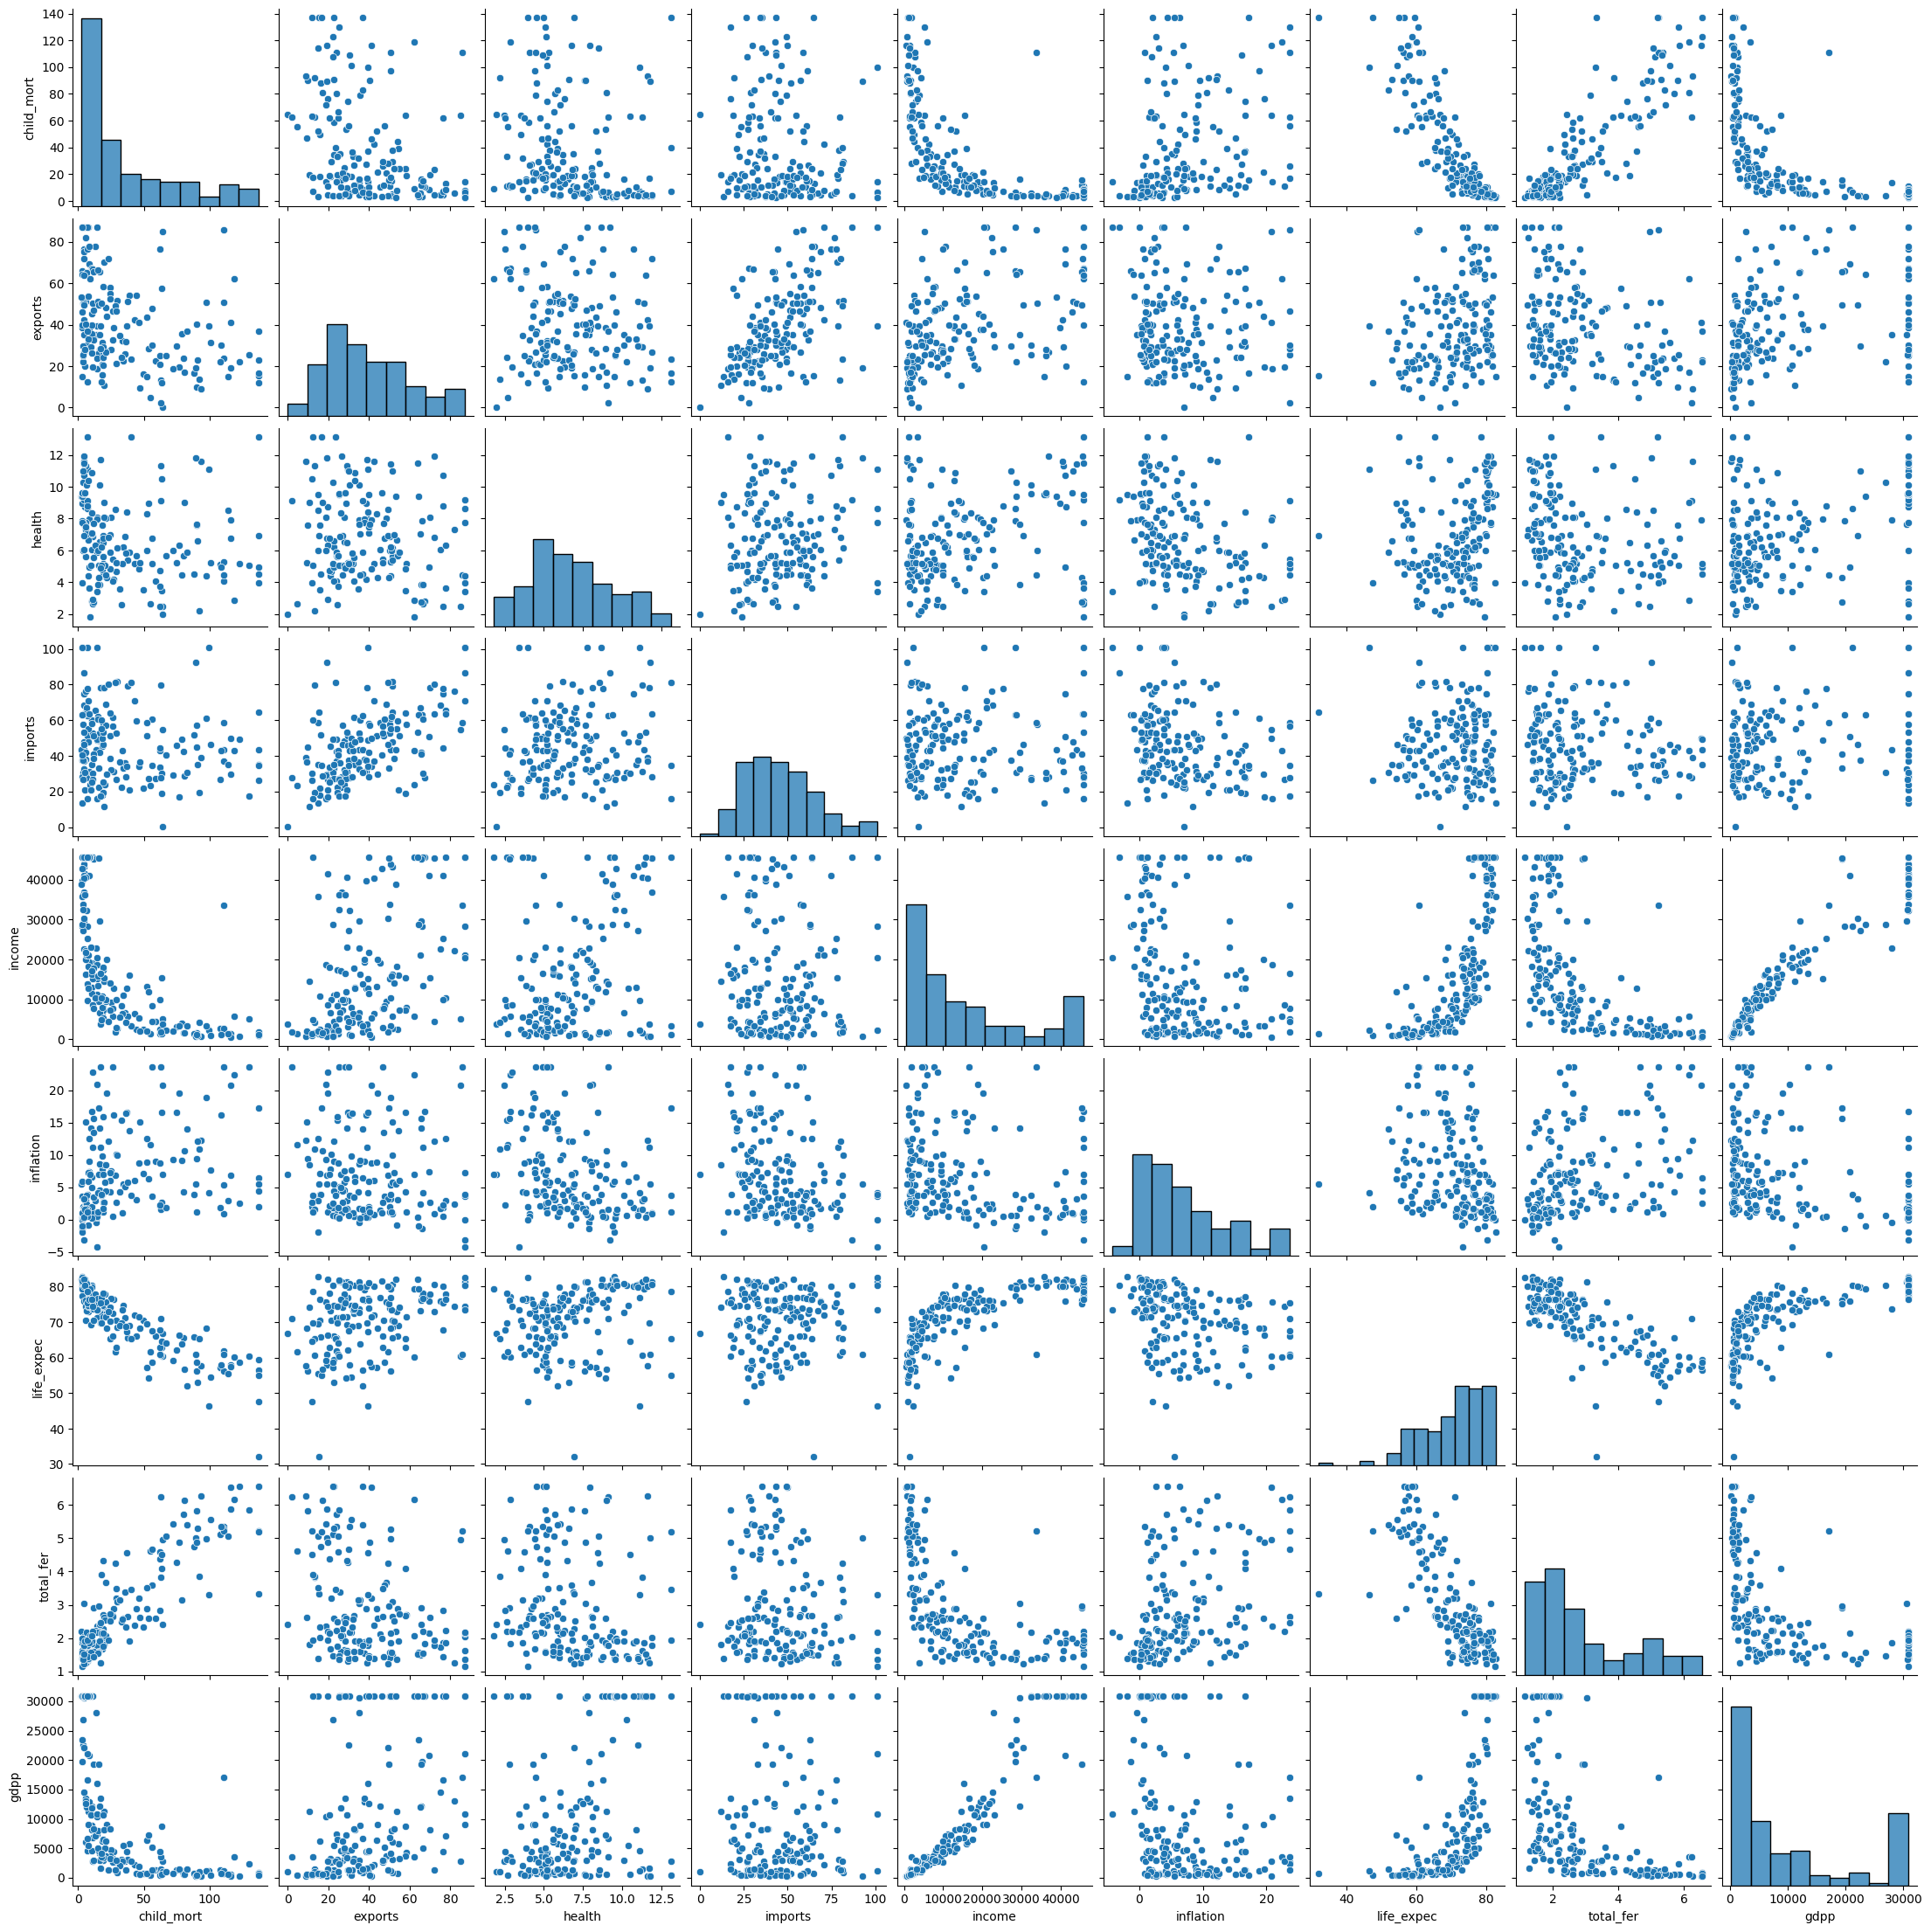

In [271]:
sns.pairplot(df)
plt.show()

* `Linear Relationships`: There are apparent linear relationships in pairs such as (income, life_expec) and (gdpp, income), indicating that increases in GDP per capita and income are associated with increases in life expectancy, suggesting economic prosperity's impact on health and longevity.

* `Non-linear Relationships`: Pairs like (child_mort, life_expec) and (total_fer, life_expec) show non-linear relationships, indicating that as child mortality and fertility rates decrease, life expectancy tends to increase, but not in a strictly linear fashion.

* `Normal and Non-normal Distributions`: The histograms for variables like inflation and child_mort display non-normal distributions with significant skewness. In contrast, variables such as income and gdpp might also show skewness towards higher values, indicating wealth accumulation in fewer countries.

* `Outliers`: Scatter plots involving gdpp and income suggest the presence of outliers, where some countries have significantly higher GDP per capita or income levels compared to others.

* `Variable Scale Differences`: There is a wide variation in scales among variables, particularly between economic measures like income and gdpp compared to health statistics such as child_mort and life_expec. This suggests that normalization might be required to compare these effectively.

* `Density Patterns`: The density plots for life_expec and total_fer indicate different degrees of skewness and potential bimodal distributions, implying diverse demographic profiles across the dataset.

* `Clusters and Gaps`: The scatter plots reveal potential clustering, especially in variables like life_expec and child_mort, indicating groups of countries with similar health outcomes and challenges.

##### Distribution
Some of the features seem to be quite right-skewed:
* child_mort
* exports
* imports
* income
* inflation
* total_fer
* gdpp

1 feature seem to be left-skewed:
* left_expec

The remaining features seem to have a more or less normal distribution:
* health

In [272]:
# let's check variable skewness
df.skew()

,0
child_mort,1.163543
exports,0.619306
health,0.416915
imports,0.663633
income,0.921268
inflation,0.943985
life_expec,-0.970996
total_fer,0.922062
gdpp,1.051643


In [273]:
# Normality check for exch column of dataframe
def norm_check(data):
    for var in range(len(data.skew())):
        if abs(data.skew()[var]) > 0.75:
            print('"{}" skew: {}. The variable is NOT normally distributed.'.format(data.skew().index[var],
                                                                                    round(data.skew()[var],2)))
        else:
            print('"{}" skew: {}. The Variable is normally distributed'.format(data.skew().index[var],
                                                                                round(data.skew()[var],2)))
norm_check(df)

"child_mort" skew: 1.16. The variable is NOT normally distributed.
"exports" skew: 0.62. The Variable is normally distributed
"health" skew: 0.42. The Variable is normally distributed
"imports" skew: 0.66. The Variable is normally distributed
"income" skew: 0.92. The variable is NOT normally distributed.
"inflation" skew: 0.94. The variable is NOT normally distributed.
"life_expec" skew: -0.97. The variable is NOT normally distributed.
"total_fer" skew: 0.92. The variable is NOT normally distributed.
"gdpp" skew: 1.05. The variable is NOT normally distributed.


##### Correlation
There seems to be a linear correlation (either positive or negative) between several features:
* child_mort and life_expec
* total_fer and child_mort
* exports and imports
* income and gdpp
* life_expec and total_fer

In [274]:
df.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.347427,-0.217905,-0.121251,-0.632881,0.319989,-0.876289,0.883379,-0.600041
exports,-0.347427,1.000000,-0.129099,0.597667,0.471527,-0.090091,0.313230,-0.335787,0.370043
health,-0.217905,-0.129099,1.000000,0.141612,0.253166,-0.342499,0.210924,-0.198027,0.349985
imports,-0.121251,0.597667,0.141612,1.000000,0.015359,-0.297248,0.002686,-0.137815,-0.008978
income,-0.632881,0.471527,0.253166,0.015359,1.000000,-0.244512,0.703718,-0.591700,0.958341
inflation,0.319989,-0.090091,-0.342499,-0.297248,-0.244512,1.000000,-0.301075,0.372193,-0.331730
life_expec,-0.876289,0.313230,0.210924,0.002686,0.703718,-0.301075,1.000000,-0.763701,0.691269
total_fer,0.883379,-0.335787,-0.198027,-0.137815,-0.591700,0.372193,-0.763701,1.000000,-0.555769
gdpp,-0.600041,0.370043,0.349985,-0.008978,0.958341,-0.331730,0.691269,-0.555769,1.000000


In [275]:
# I'll create a function to check which feature are lineraly correlated and what is the correlation coefficient
def corr_matrix(data):
    corr_matrix = data.corr()

    for var in corr_matrix.columns:
        corr_matrix[var] = corr_matrix[var].apply(lambda x:x if abs(x) > 0.70 and abs(x) < 1 else '')

    return corr_matrix

In [276]:
corr_matrix(df)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,,,,,,,-0.876289,0.883379,
exports,,,,,,,,,
health,,,,,,,,,
imports,,,,,,,,,
income,,,,,,,0.703718,,0.958341
inflation,,,,,,,,,
life_expec,-0.876289,,,,0.703718,,,-0.763701,
total_fer,0.883379,,,,,,-0.763701,,
gdpp,,,,,0.958341,,,,


**Inferences:**

- It is expected that **child mortality** and **life expectancy** have a **strong negative correlation** of **0.88**.
- A **strong positive correlation** of **0.88** exists between **child mortality** and **total fertility**.
- A **strong positive correlation** of **0.70** between **income** and **life expectancy**.
- There is a **very strong positive correlation** of **0.96** between **income** and **GDP**, as expected.
- **Fertility** and **life expectancy** are **negatively correlated** with a coefficient of **0.76**.

The only normally distributed variable is: health. The correlation matrix confirmed the results from the pairplots inspection.
Let's apply several transformations to bring the data into the Gaussian distribution.

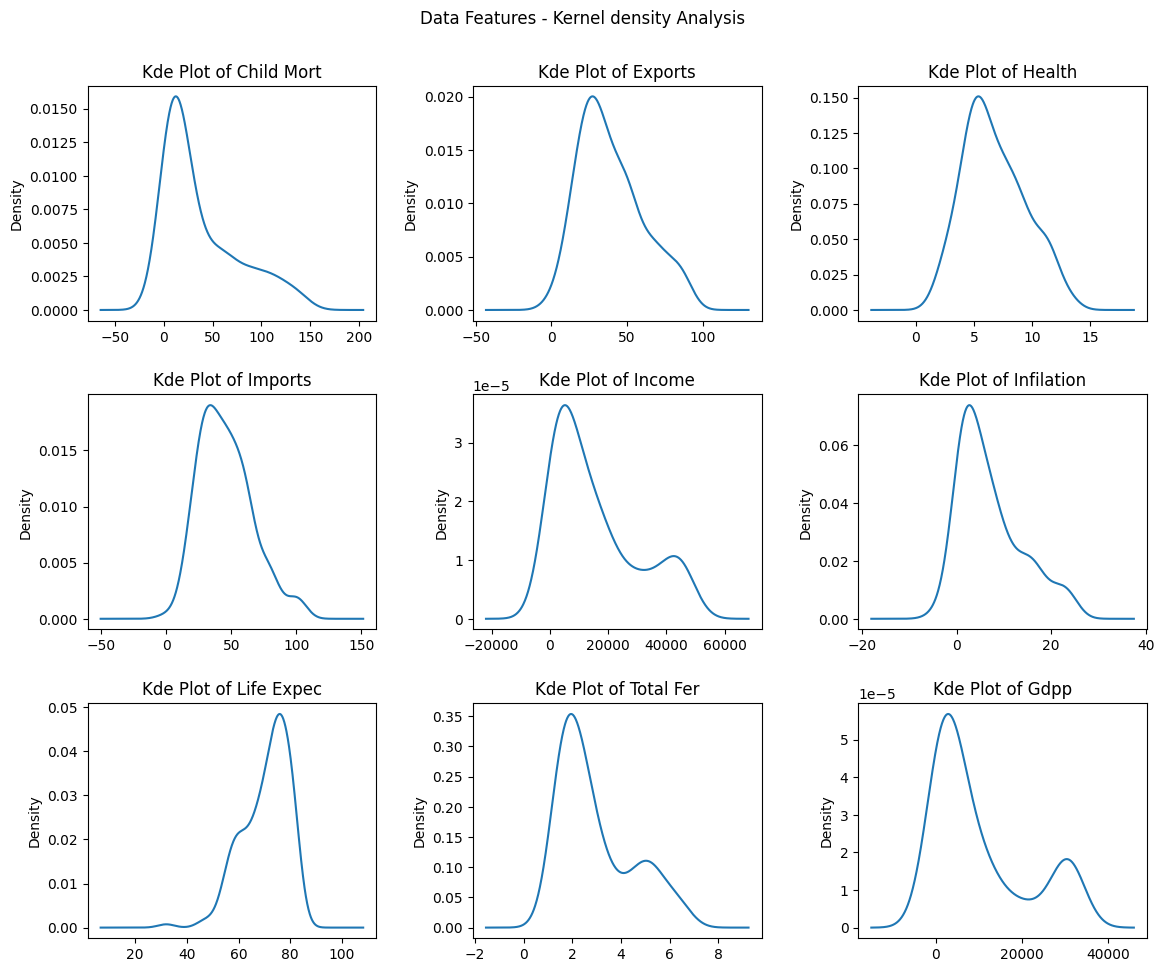

In [277]:
fig = plt.figure(figsize=(12,10))
child_mort = fig.add_subplot(3,3,1)
exports = fig.add_subplot(3,3,2)
health = fig.add_subplot(3,3,3)
imports = fig.add_subplot(3,3,4)
income = fig.add_subplot(3,3,5)
inflation = fig.add_subplot(3,3,6)
life_expec = fig.add_subplot(3,3,7)
total_fer = fig.add_subplot(3,3,8)
gdpp = fig.add_subplot(3,3,9)

df['child_mort'].plot(kind='kde', fontsize=10, ax=child_mort,title= 'Kde Plot of Child Mort')
#child_mort.grid(True,axis='both',color='grey')
df['exports'].plot(kind='kde', fontsize=10,ax=exports,title= 'Kde Plot of Exports')
#exports.grid(True,axis='both',color='grey')
df['health'].plot(kind='kde', fontsize=10,ax=health,title= 'Kde Plot of Health')
#health.grid(True,axis='both',color='grey')
df['imports'].plot(kind='kde', fontsize=10,ax=imports,title= 'Kde Plot of Imports')
#imports.grid(True,axis='both',color='grey')
df['income'].plot(kind='kde', fontsize=10,ax=income,title= 'Kde Plot of Income')
#income.grid(True,axis='both',color='grey')
df['inflation'].plot(kind='kde', fontsize=10,ax=inflation,title= 'Kde Plot of Infilation')
#inflation.grid(True,axis='both',color='grey')
df['life_expec'].plot(kind='kde', fontsize=10,ax=life_expec,title= 'Kde Plot of Life Expec')
#life_expec.grid(True,axis='both',color='grey')
df['total_fer'].plot(kind='kde', fontsize=10,ax=total_fer,title= 'Kde Plot of Total Fer')
#total_fer.grid(True,axis='both',color='grey')
df['gdpp'].plot(kind='kde', fontsize=10,ax=gdpp,title= 'Kde Plot of Gdpp')
#gdpp.grid(True,axis='both',color='grey')

fig.suptitle('Data Features - Kernel density Analysis', fontsize=12)
plt.tight_layout(pad=2)
plt.show()

### Inferences:

None of the columns have even distribution and further analysis of the columns show presence of outliers as below:

- `child_mort`is right skewed and it indicates that there are countries which have higher values of child mortality and majority of values lie between 0 and 50

- `exports`, `imports`, `health` have huge number of outliers and it is right skewed

- `income` has slight outliers with majority of countries having per person income as between 0 and 25000

- `inflation` has some higher outliers and is right skewed.

- `life_expec` has some lower outliers and is left skewed.

- `gdpp` is right skewed and indicate few countries are doing good and their GDP is pretty high and do not need any aid.

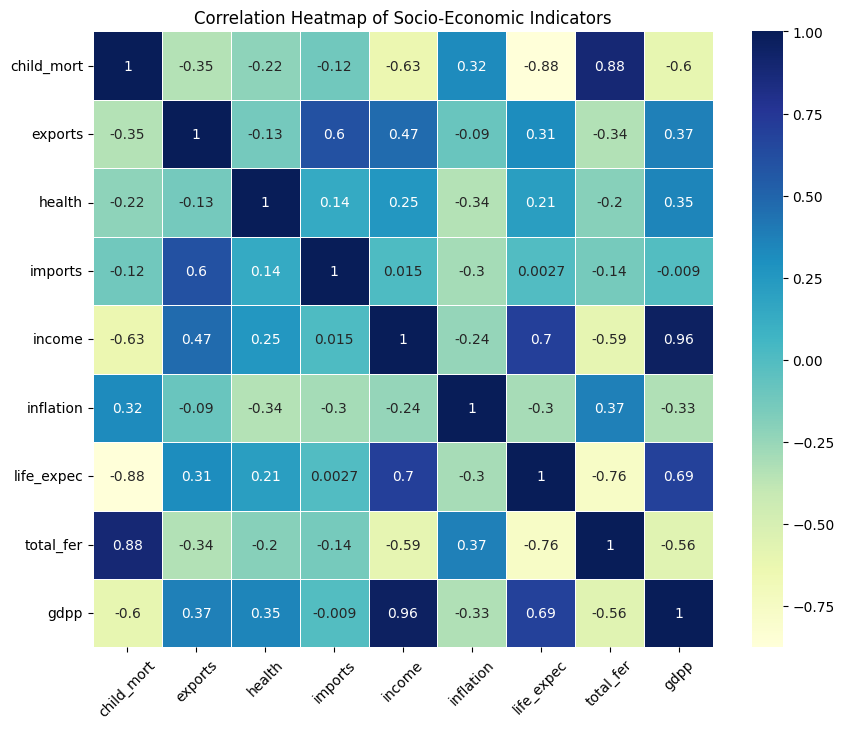

In [278]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, cmap = 'YlGnBu')

# Customize the plot
plt.title('Correlation Heatmap of Socio-Economic Indicators')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the plot
plt.show()

### Inferences:
- imports and exports are highly correlated with correlation of 0.6
- health and gdpp are low correlated with correlation of 0.35
- income and gdpp are highly correlated with correlation of 0.96
- child_mortality and life_expentency are highly and inversely correlated with correlation of -0.88
- child_mortality and total_fertility are highly correlated with correlation of 0.88
life_expentency and total_fertility are highly correlated with correlation of -0.76
- gdpp and exports are low correlated with correlation of 0.37
- gdpp and imports are negative correlated with correlation of 0.009

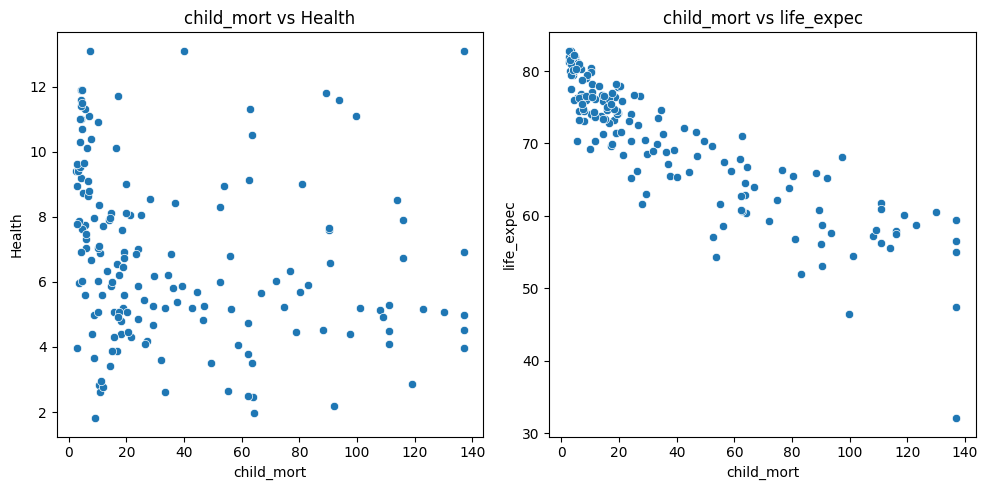

In [279]:
# Scatter plot for child_mort vs. health & child_mort vs life_expec
plt.figure(figsize=(10, 5))

# Scatter plot for child_mort vs health spending
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='child_mort', y='health')
plt.title('child_mort vs Health')
plt.xlabel('child_mort')
plt.ylabel('Health')

# Scatter plot for child_mort vs life_expec
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='child_mort', y='life_expec')
plt.title('child_mort vs life_expec')
plt.xlabel('child_mort')
plt.ylabel('life_expec')

plt.tight_layout()
plt.show()

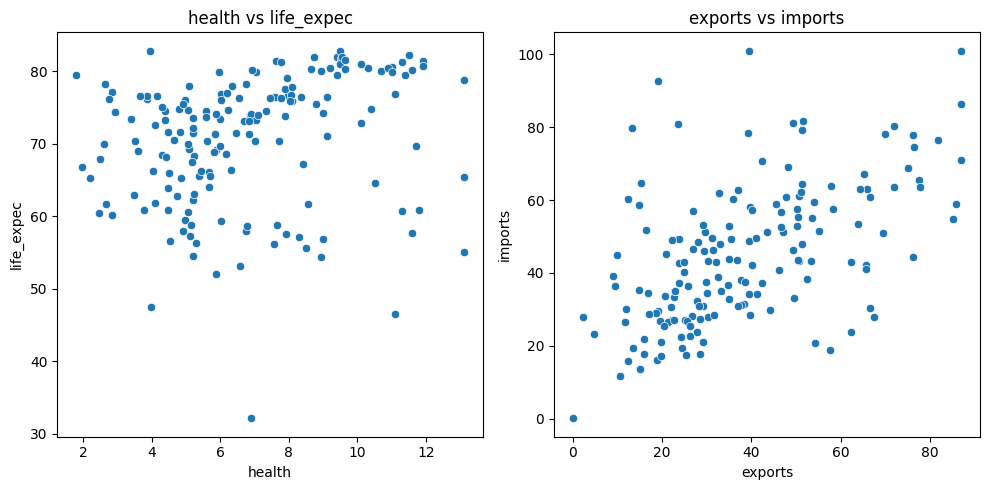

In [280]:
# Scatter plot for health vs. life_expec & exports vs imports
plt.figure(figsize=(10, 5))

# Scatter plot for health vs. life_expec
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='health', y='life_expec')
plt.title('health vs life_expec')
plt.xlabel('health')
plt.ylabel('life_expec')

# Scatter plot for exports vs imports
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='exports', y='imports')
plt.title('exports vs imports')
plt.xlabel('exports')
plt.ylabel('imports')

plt.tight_layout()
plt.show()

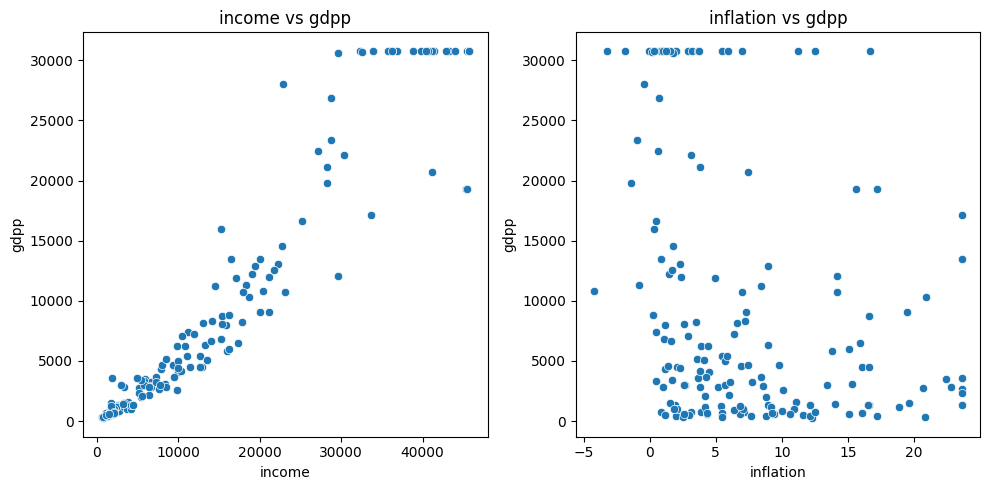

In [281]:
# Scatter plot for income vs. gdpp & inflation vs gdpp
plt.figure(figsize=(10, 5))

# Scatter plot for income vs. gdpp
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='income', y='gdpp')
plt.title('income vs gdpp')
plt.xlabel('income')
plt.ylabel('gdpp')

# Scatter plot for inflation vs gdpp
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='inflation', y='gdpp')
plt.title('inflation vs gdpp')
plt.xlabel('inflation')
plt.ylabel('gdpp')

plt.tight_layout()
plt.show()

## Hypothesis Testing

#### Health Spending and Life Expectancy

In [282]:
# Define a threshold for high vs. low health spending
threshold = df['health'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the health spending threshold
high_health_spending = df[df['health'] > threshold]['life_expec']
low_health_spending = df[df['health'] <= threshold]['life_expec']

# Conduct a t-test to compare the means of life expectancy
t_stat, p_value = stats.ttest_ind(high_health_spending, low_health_spending)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in life expectancy between countries with high and low health spending.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in life expectancy between countries with high and low health spending.")

T-statistic: 2.934
P-value: 0.004
Reject the null hypothesis: There is a significant difference in life expectancy between countries with high and low health spending.


#### Fertility and Development:

Correlation coefficient between Total_fertility and Income: -0.592


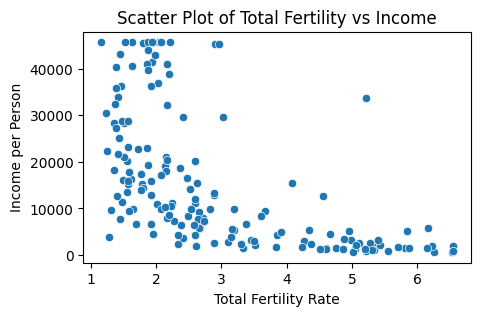

In [283]:
# Calculate the correlation coefficient
correlation = df['total_fer'].corr(df['income'])
print(f"Correlation coefficient between Total_fertility and Income: {correlation:.3f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='total_fer', y='income')
plt.title('Scatter Plot of Total Fertility vs Income')
plt.xlabel('Total Fertility Rate')
plt.ylabel('Income per Person')
plt.show()

In [284]:
# Define a threshold for high vs. low fertility
threshold = df['total_fer'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the fertility threshold
high_fertility = df[df['total_fer'] > threshold]['income']
low_fertility = df[df['total_fer'] <= threshold]['income']

# Conduct a t-test to compare the means of income
t_stat, p_value = stats.ttest_ind(high_fertility, low_fertility)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in income between countries with high and low fertility rates.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in income between countries with high and low fertility rates.")

T-statistic: -9.728
P-value: 0.000
Reject the null hypothesis: There is a significant difference in income between countries with high and low fertility rates.


#### Income and Child Mortality:

Pearson correlation coefficient between Income and Child Mortality: -0.633


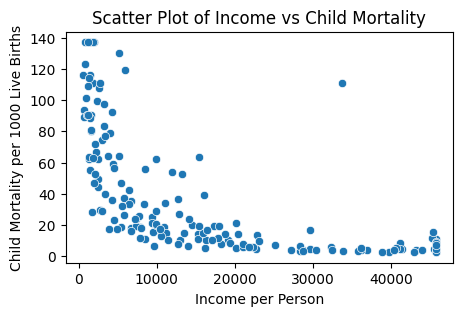

In [285]:
# Calculate the Pearson correlation coefficient
correlation = df['income'].corr(df['child_mort'])
print(f"Pearson correlation coefficient between Income and Child Mortality: {correlation:.3f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='income', y='child_mort')
plt.title('Scatter Plot of Income vs Child Mortality')
plt.xlabel('Income per Person')
plt.ylabel('Child Mortality per 1000 Live Births')
plt.show()

In [286]:
# Define a threshold for high vs. low income
threshold = df['income'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the income threshold
high_income = df[df['income'] > threshold]['child_mort']
low_income = df[df['income'] <= threshold]['child_mort']

# Conduct a t-test to compare the means of child mortality rates
t_stat, p_value = stats.ttest_ind(high_income, low_income)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in child mortality rates between countries with high and low income.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in child mortality rates between countries with high and low income.")

T-statistic: -10.689
P-value: 0.000
Reject the null hypothesis: There is a significant difference in child mortality rates between countries with high and low income.


#### Inflation and Economic Stability:

Pearson correlation coefficient between Inflation and GDP per capita: -0.332


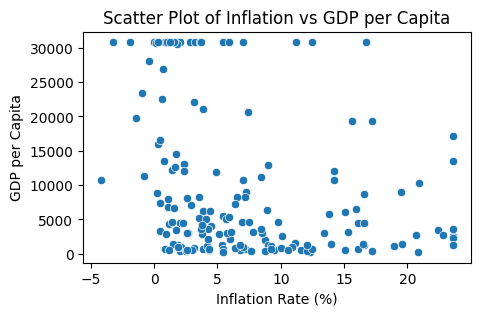

In [287]:
# Calculate the Pearson correlation coefficient
correlation = df['inflation'].corr(df['gdpp'])
print(f"Pearson correlation coefficient between Inflation and GDP per capita: {correlation:.3f}")

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(5, 3))
sns.scatterplot(data=df, x='inflation', y='gdpp')
plt.title('Scatter Plot of Inflation vs GDP per Capita')
plt.xlabel('Inflation Rate (%)')
plt.ylabel('GDP per Capita')
plt.show()

In [288]:
# Define a threshold for high vs. low inflation
threshold = df['inflation'].median()  # Using median as the threshold for simplicity

# Divide the data into two groups based on the inflation threshold
high_inflation = df[df['inflation'] > threshold]['gdpp']
low_inflation = df[df['inflation'] <= threshold]['gdpp']

# Conduct a t-test to compare the means of GDP per capita
t_stat, p_value = stats.ttest_ind(high_inflation, low_inflation)

# Print the results
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in GDP per capita between countries with high and low inflation.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in GDP per capita between countries with high and low inflation.")

T-statistic: -4.472
P-value: 0.000
Reject the null hypothesis: There is a significant difference in GDP per capita between countries with high and low inflation.


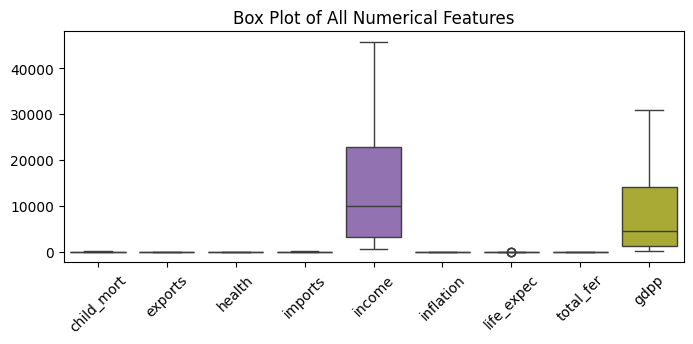

In [289]:
numeric_data = df.select_dtypes(include=['number'])

# Create a box plot for all numerical features
plt.figure(figsize=(8, 3))
sns.boxplot(data=numeric_data)
plt.title('Box Plot of All Numerical Features')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()

### ML Model Building & Deployment <a name=eda></a>

In [290]:
df_new = df.copy()

In [291]:
df_new.reset_index(inplace=True)

In [292]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Define a function to categorize countries into regions
def assign_region(country):
  if country in ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Japan', 'Kazakhstan','Kyrgyz Republic', 'Lao', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Pakistan', 'Philippines', 'Singapore', 'South Korea','Sri Lanka', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkmenistan', 'Uzbekistan', 'Vietnam']:
    return 'Asia'
  elif country in ['Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark','Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Serbia','Slovak Republic', 'Slovenia', 'Spain', 'Sweden','Switzerland', 'Turkey', 'Ukraine', 'United Kingdom']:
  	return 'Europe'
  elif country in ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad','Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote dIvoire', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco','Mozambique', 'Mauritius', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia']:
    return 'Africa'
  elif country in ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Dominican Republic', 'Grenada', 'Haiti', 'Jamaica', 'St. Vincent and the Grenadines']:
    return 'Caribbean'
  elif country in ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']:
    return 'South America'
  elif country in ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Panama']:
    return 'Central America'
  elif country in ['Canada', 'United States']:
    return 'North America'
  elif country in ['Australia', 'Fiji', 'Kiribati', 'Micronesia, Fed. Sts.', 'New Zealand', 'Samoa', 'Solomon Islands', 'Tonga', 'Vanuatu']:
    return 'Oceania'
  elif country in ['Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Yemen']:
    return 'Middle East'
  else:
    return 'Other'


In [294]:
# Apply the function to create the 'regions' column
df_new['regions'] = df_new['country'].apply(assign_region)

In [295]:
df_new.regions.value_counts()

,count
regions,
Africa,47
Europe,41
Asia,31
South America,12
Middle East,12
Oceania,9
Caribbean,8
Central America,5
North America,2


In [296]:
df_new.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,regions
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Africa
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Caribbean


In [297]:
df_new['import_export_ratio'] = (df_new['exports'] / df_new['imports'])*100

In [298]:
df_new['gdpp_log'] = np.log1p(df_new['gdpp'])

In [299]:
df_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,regions,import_export_ratio,gdpp_log
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Asia,22.271715,6.317165
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Europe,57.613169,8.316545
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Africa,122.292994,8.403128
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Africa,145.221445,8.169336
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Caribbean,77.249576,9.409273


In [300]:
#One Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_regions = encoder.fit_transform(df_new[['regions']])

# Create a DataFrame from the encoded features
encoded_regions_df = pd.DataFrame(encoded_regions.toarray(), columns=encoder.get_feature_names_out(['regions']))

# Concatenate the encoded features with the original DataFrame
df_new = pd.concat([df_new, encoded_regions_df], axis=1)

# Drop the original 'regions' column
df_new = df_new.drop('regions', axis=1)

In [301]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  167 non-null    object 
 1   child_mort               167 non-null    float64
 2   exports                  167 non-null    float64
 3   health                   167 non-null    float64
 4   imports                  167 non-null    float64
 5   income                   167 non-null    int64  
 6   inflation                167 non-null    float64
 7   life_expec               167 non-null    float64
 8   total_fer                167 non-null    float64
 9   gdpp                     167 non-null    int64  
 10  import_export_ratio      167 non-null    float64
 11  gdpp_log                 167 non-null    float64
 12  regions_Africa           167 non-null    float64
 13  regions_Asia             167 non-null    float64
 14  regions_Caribbean        1

In [302]:
# Select numerical columns for scaling
numerical_cols = df_new.select_dtypes(include=['float', 'int']).columns

# Initialize the scaler
scaler = StandardScaler()  # or MinMaxScaler() depending on your preference

# Fit and transform the numerical columns
df_new[numerical_cols] = scaler.fit_transform(df_new[numerical_cols])

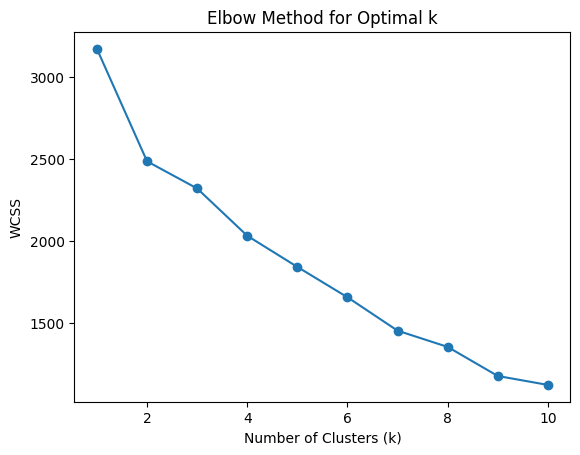

In [303]:
# Assuming 'df_new' is your DataFrame with relevant features for clustering
# Select numerical features for clustering
X = df_new[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
            'life_expec', 'total_fer','import_export_ratio', 'gdpp_log',
       'regions_Africa','regions_Asia', 'regions_Caribbean', 'regions_Central America',
       'regions_Europe', 'regions_Middle East', 'regions_North America',
       'regions_Oceania', 'regions_South America']]

# Initialize list to store WCSS (Within-Cluster Sum of Squares)
wcss = []

# Try different values of k (number of clusters)
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [304]:
df_new.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,import_export_ratio,gdpp_log,regions_Africa,regions_Asia,regions_Caribbean,regions_Central America,regions_Europe,regions_Middle East,regions_North America,regions_Oceania,regions_South America
0,Afghanistan,1.387135,-1.410447,0.304210,-0.046852,-0.968566,0.360058,-1.619092,1.927014,-0.866842,-1.572204,-1.519029,-0.625833,2.094540,-0.224309,-0.175682,-0.570436,-0.278243,-0.110096,-0.238667,-0.278243
1,Albania,-0.552232,-0.546045,-0.087636,0.135953,-0.392516,-0.385139,0.647866,-0.865174,-0.542378,-0.772073,-0.083190,-0.625833,-0.477432,-0.224309,-0.175682,1.753046,-0.278243,-0.110096,-0.238667,-0.278243
2,Algeria,-0.270286,-0.046613,-0.993068,-0.713844,-0.186883,1.362688,0.670423,-0.034883,-0.508436,0.692279,-0.021011,1.597871,-0.477432,-0.224309,-0.175682,-0.570436,-0.278243,-0.110096,-0.238667,-0.278243
3,Angola,2.146017,1.101120,-1.495240,-0.145666,-0.671540,2.311121,-1.179234,2.154674,-0.593749,1.211380,-0.188907,1.597871,-0.477432,-0.224309,-0.175682,-0.570436,-0.278243,-0.110096,-0.238667,-0.278243
4,Antigua and Barbuda,-0.718237,0.294345,-0.285462,0.644842,0.242386,-0.844301,0.704258,-0.543771,0.201588,-0.327505,0.701544,-0.625833,-0.477432,4.458139,-0.175682,-0.570436,-0.278243,-0.110096,-0.238667,-0.278243


[[-0.4452502   0.16564565  0.30877526  0.24069498 -0.38365361 -0.51641425
   0.50124723 -0.24245549 -0.20008468  0.02512938 -0.62583278 -0.47743186
  -0.22430886  5.69209979 -0.57043565 -0.27824334 -0.11009638 -0.23866719
  -0.27824334]
 [-0.60392205  0.27769474  0.11996651  0.08571474  0.43644283 -0.18018688
   0.55257976 -0.57793852  0.22198961  0.53354196 -0.52192139  0.05138474
   0.08201948 -0.17568209  0.31987046  0.11983533  0.06173629  0.05105445
   0.1560243 ]
 [ 1.21538019 -0.55530118 -0.26145986 -0.18863549 -0.81420209  0.39749213
  -1.12058673  1.14639452 -0.41368119 -1.04026612  1.07226823 -0.05656377
  -0.13917345 -0.17568209 -0.57043565 -0.20783934 -0.11009638 -0.0776271
  -0.27824334]]


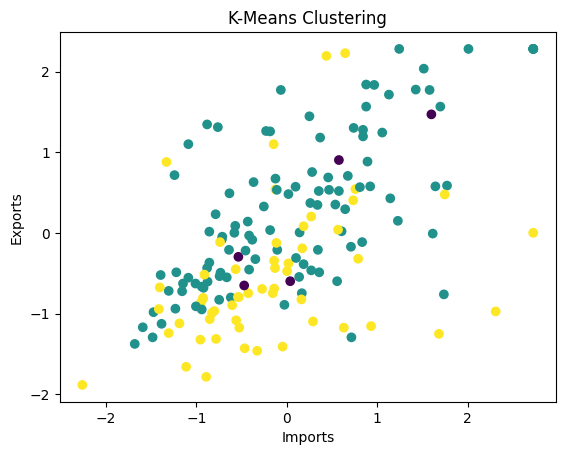

In [305]:
# Based on the Elbow method, choose the optimal k (let's assume k=3)
optimal_k = 3

# Initialize KMeans with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get cluster labels for each data point
df_new['Cluster'] = kmeans.labels_

# Print the cluster centers
print(kmeans.cluster_centers_)

# Visualize the clusters (example using two features)
plt.scatter(df_new['imports'], df_new['exports'], c=df_new['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()

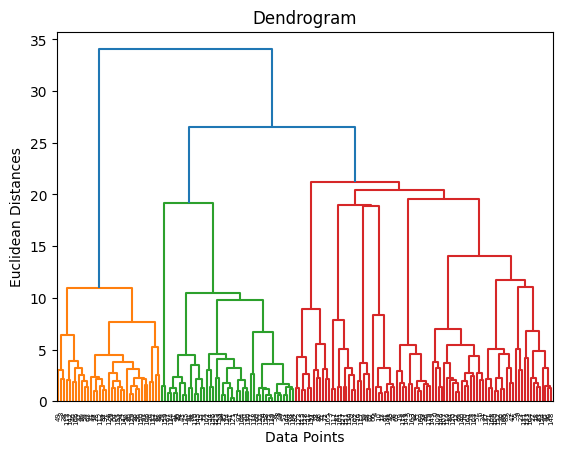

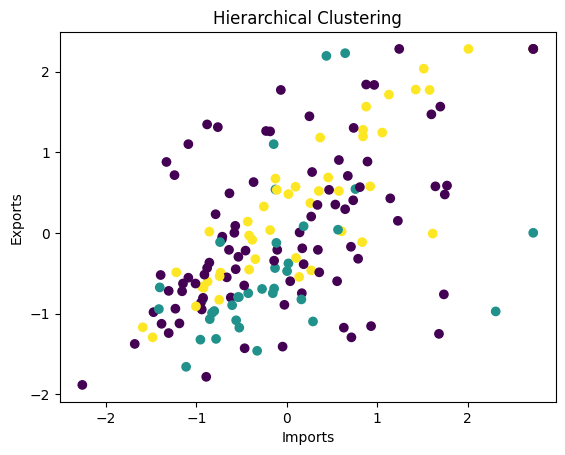

In [306]:
 # Create a dendrogram to visualize the hierarchical structure
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

# Perform Agglomerative Clustering (choose the number of clusters based on the dendrogram)
# Let's assume we want 3 clusters
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Add cluster labels to your DataFrame
df_new['Cluster_HC'] = y_hc

# Visualize the clusters (example using two features)
plt.scatter(df_new['imports'], df_new['exports'], c=df_new['Cluster_HC'], cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()

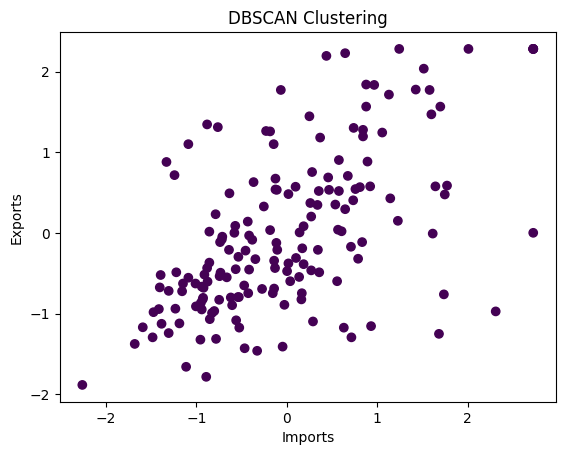

In [307]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed

# Fit the model to the data
y_dbscan = dbscan.fit_predict(X)

# Add cluster labels to your DataFrame
df_new['Cluster_DBSCAN'] = y_dbscan

# Visualize the clusters (example using two features)
plt.scatter(df_new['imports'], df_new['exports'], c=df_new['Cluster_DBSCAN'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()


In [308]:
# Calculate Silhouette Coefficient for KMeans
silhouette_kmeans = silhouette_score(X, df_new['Cluster'])
print("Silhouette Coefficient for KMeans:", silhouette_kmeans)

# Calculate Silhouette Coefficient for Agglomerative Clustering
silhouette_hc = silhouette_score(X, df_new['Cluster_HC'])
print("Silhouette Coefficient for Hierarchical Clustering:", silhouette_hc)

# Calculate Silhouette Coefficient for DBSCAN (excluding noise points)
core_samples_mask = np.zeros_like(y_dbscan, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels_dbscan = y_dbscan[core_samples_mask]
X_dbscan = X[core_samples_mask]
if len(set(labels_dbscan)) > 1:  # Check if there are at least two clusters (excluding noise)
    silhouette_dbscan = silhouette_score(X_dbscan, labels_dbscan)
    print("Silhouette Coefficient for DBSCAN:", silhouette_dbscan)
else:
    print("Silhouette Coefficient for DBSCAN cannot be calculated as there are less than two clusters (excluding noise).")

Silhouette Coefficient for KMeans: 0.23819085633968562
Silhouette Coefficient for Hierarchical Clustering: 0.1962156957132629
Silhouette Coefficient for DBSCAN cannot be calculated as there are less than two clusters (excluding noise).


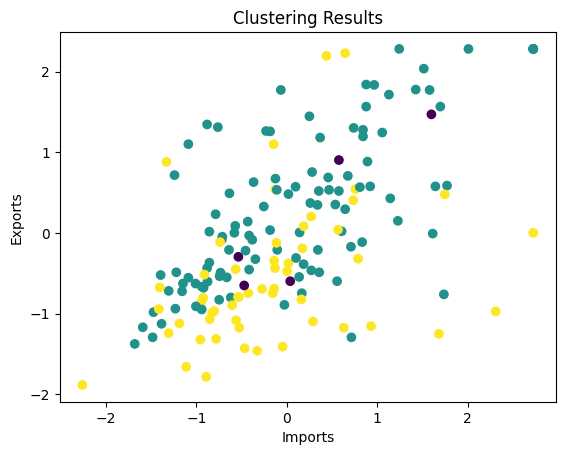

In [309]:
# Visualize the clusters (example using two features)
plt.scatter(df_new['imports'], df_new['exports'], c=df_new['Cluster'], cmap='viridis')
plt.title('Clustering Results')
plt.xlabel('Imports')
plt.ylabel('Exports')
plt.show()

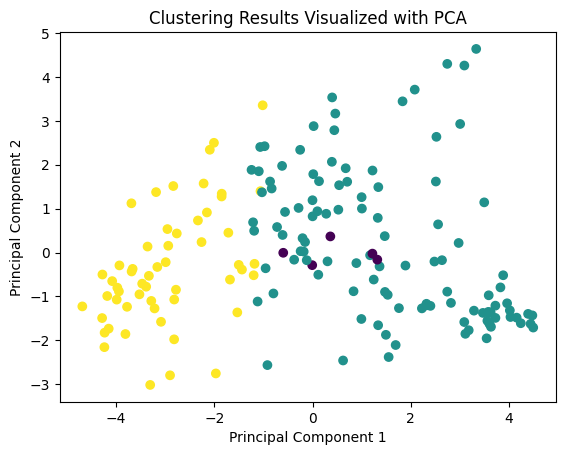

In [310]:
# Select numerical features for PCA
X = df_new.select_dtypes(include=['float', 'int'])

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
X_pca = pca.fit_transform(X)

# Create a DataFrame from the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = df_new['Cluster']  # Replace 'Cluster' with the actual column name for cluster labels

# Visualize the clusters using PCA
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('Clustering Results Visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [311]:
# Get the features of the given country
country_name = input("Enter a country Name : ")  # Replace with the actual country name
country_data = df_new[df_new['country'] == country_name][['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer','import_export_ratio', 'gdpp_log',
       'regions_Africa','regions_Asia', 'regions_Caribbean', 'regions_Central America',
       'regions_Europe', 'regions_Middle East', 'regions_North America',
       'regions_Oceania', 'regions_South America']].values

# Predict the cluster for the given country
country_cluster = kmeans.predict(country_data)[0]

# Find countries in the same cluster
similar_countries = df_new[df_new['Cluster'] == country_cluster]['country'].tolist()

# Remove the given country from the list of similar countries
similar_countries.remove(country_name)

print(f"Countries similar to {country_name} based on KMeans clustering: {similar_countries}")


Enter a country Name : India
Countries similar to India based on KMeans clustering: ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']


In [312]:
import pickle
import os
#FIle Path
file_path = '/content/Clustering Countries for Strategic Aid Allocation.pkl'

# Save the KMeans model to the pickle file
with open(file_path, 'wb') as file:
  pickle.dump(kmeans, file)